In [3]:
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',header=None,names=["sentiment", "ids", "date", "flag", "user", "text"])
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df=df[['text','sentiment']]

In [6]:
df.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


[Text(0, 0, 'positive'), Text(1, 0, 'negative')]

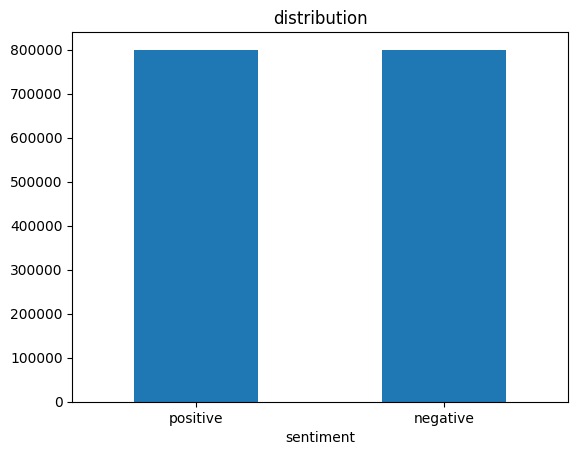

In [7]:
ax=df.groupby('sentiment')['text'].count().plot(kind='bar',title='distribution',legend=False)
ax.set_xticklabels(['positive','negative'],rotation=0)

#The Preprocessing steps taken are:`

Lower Casing: Each text is converted to lowercase.

Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".

Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")

Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")

Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.

Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")

Removing Short Words: Words with length less than 2 are removed.

Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")


Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [8]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [9]:
df['text']=df['text'].str.lower()

In [10]:
df['text'][0]

"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

In [11]:
import re
def preprocessing_url_pattern(text):
  url_pattern=r'((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)'
  tweet=re.sub(url_pattern,' URL',text)
  return  tweet

In [12]:
df['text']=df['text'].apply(preprocessing_url_pattern)

In [13]:
df['text'][0]

"@switchfoot  URL - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

In [14]:
def preprocessing_emoji(text):
  for emoji in emojis.keys():
    tweet=text.replace(emoji,' EMOJI')
  return tweet

In [15]:
df['text']=df['text'].apply(preprocessing_emoji)

In [16]:
df['text'][0]

"@switchfoot  URL - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

In [17]:
def preprocessing_user_pattern(text):
  url_pattern=r'@[^\s]+'
  tweet=re.sub(url_pattern,' USER',text)
  return  tweet

In [18]:
text="@switchfoot  URL - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"
preprocessing_user_pattern(text)

" USER  URL - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

In [19]:
df['text']=df['text'].apply(preprocessing_user_pattern)

In [20]:
def preprocessing_alphanum_pattern(text):
  alphanum=r'[^a-zA-Z0_9]'
  tweet=re.sub(alphanum,' ',text)
  return  tweet

In [21]:
preprocessing_alphanum_pattern('uhwef84893@#$%huehre@#$#$#@1736565')

'uhwef   9     huehre              '

In [22]:
df['text']=df['text'].apply(preprocessing_alphanum_pattern)

In [23]:
def preprocessing_special_sequence(text):
  sequence=r'(.)\1\1+'
  sequence_replace=r'\1\1'
  tweet=re.sub(sequence,sequence_replace,text)
  return  tweet

In [24]:
preprocessing_special_sequence('heyyyyyyy')

'heyy'

In [25]:
df['text']=df['text'].apply(preprocessing_special_sequence)

In [26]:
def Removing_Short_Words(text):
    return ' '.join([word for word in text.split() if len(word) > 1])

In [27]:
Removing_Short_Words('it was a lit')

'it was lit'

In [28]:
df['text']=df['text'].apply(Removing_Short_Words)

In [29]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [30]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
df['text']=df['text'].apply(lemmatize_words)

In [32]:
df['text'][0]

'USER URL aww that bummer you shoulda got david carr of third day to do it'

#`Word-Cloud for Positive tweets.`

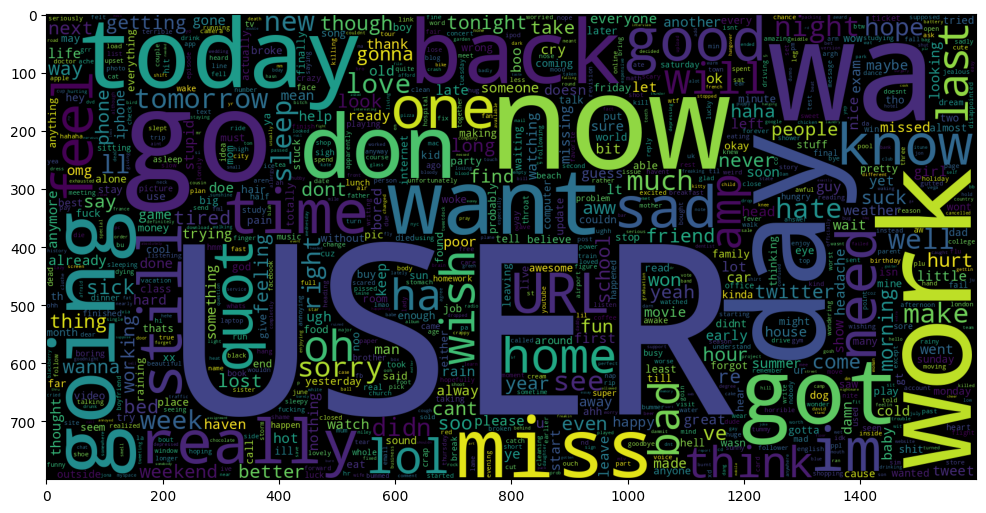

In [33]:
data=df.iloc[:800000,0]
plt.figure(figsize=(12,12))
wc=WordCloud(max_words=1000,height=800,width=1600,collocations=False).generate(" ".join(data))
plt.imshow(wc)

#`Word-Cloud for Positive tweets.`

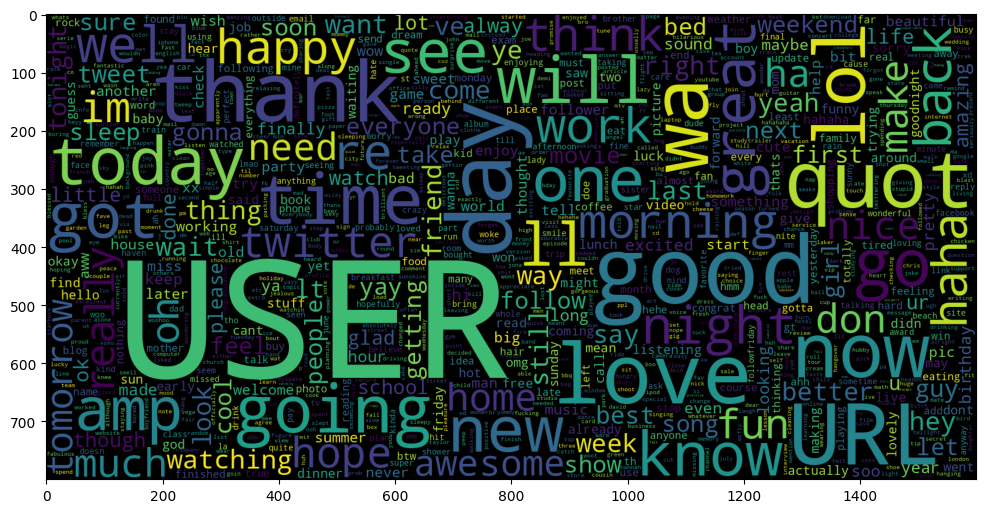

In [34]:
data=df.iloc[800000:,0]
plt.figure(figsize=(12,12))
wc=WordCloud(max_words=1000,height=800,width=1600,collocations=False).generate(" ".join(data))
plt.imshow(wc)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['sentiment'],
                                                    test_size = 0.05, random_state = 0)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=50000)

# Fit and transform the training data into a sparse matrix
X_train_trasform = tfidf_vectorizer.fit_transform(X_train)  # X_train should be a list or Series of text

In [37]:
print('No. of feature_words: ', len(tfidf_vectorizer.get_feature_names_out()))

No. of feature_words:  50000


In [38]:
X_test_trasform=tfidf_vectorizer.transform(X_test)

In [44]:
def model_Evaluate(model):

    # Predict values for Test dataset
    y_pred = model.predict(X_test_trasform)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [40]:
from sklearn.naive_bayes import BernoulliNB

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     39989
           4       0.78      0.79      0.78     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



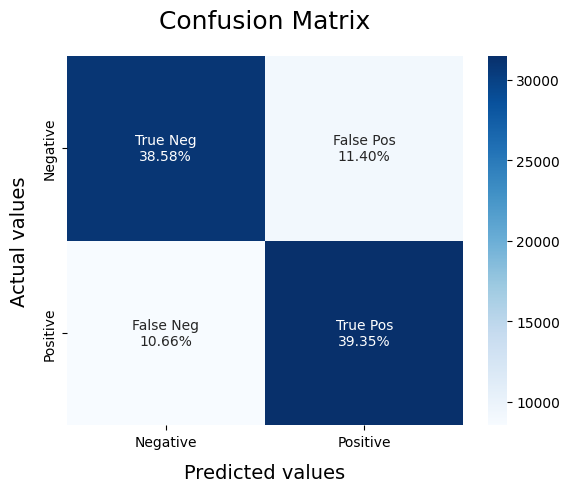

In [45]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train_trasform, y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           4       0.79      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



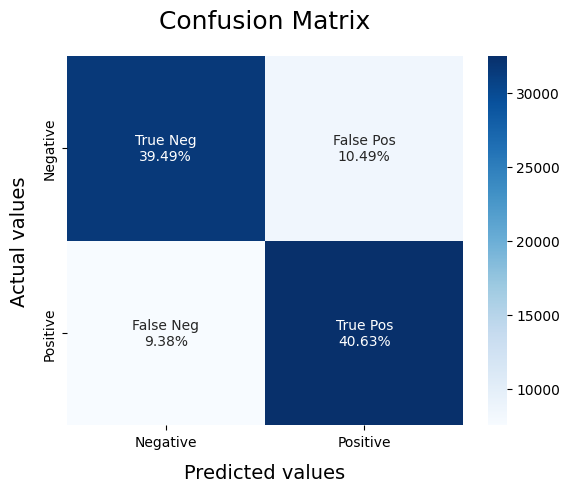

In [47]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train_trasform, y_train)
model_Evaluate(LRmodel)

In [48]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(tfidf_vectorizer, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

##`using this model`

In [74]:
def load_model():
  file=open('/content/vectoriser-ngram-(1,2).pickle','rb')
  vectorizor=pickle.load(file)
  file.close()
  file=open('/content/Sentiment-LR.pickle','rb')
  LR=pickle.load(file)
  file.close()
  return vectorizor,LR
def predict(vectorizor,model,text):
  text_data=vectorizor.transform(text)
  sentiment=model.predict(text_data)
  data=[]
  for text,pred in zip(text,sentiment):
    data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df1 = pd.DataFrame(data, columns = ['text','sentiment'])
    df1 = df1.replace([0,1,4], ["Negative","Positive",'neutral'])
  return df1
 # Text to classify should be in a list.
if __name__=="__main__":
  vectorizor, LR = load_model()
  text = ["I hate twitter","May the Force be with you.","Mr. Stark, I don't feel so good"]
  df1 = predict(vectorizor,LR, text)
  print(df1.head())

                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.   neutral
2  Mr. Stark, I don't feel so good  Negative
